# <font color = "blue">Lending Club Case Study</font>


## Business Understanding :

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

 I)Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

   1)Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

   2)Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These                 candidates are not labelled as 'defaulted'.

   3)Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on                     the loan 

 II)Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the                      loan was rejected, there is no transactional history of those applicants with the company and so this data                      is not available with the company (and thus in this dataset)

## Business Objectives :
 
   The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment. 

# Load the Loan data and clean it

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


#set pandas options to display the data correctly in the Notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# load the csv data provided
loan = pd.read_csv('./loan.csv',encoding='ISO-8859-10')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [40]:
# Understading data set
loan.shape

(39717, 111)

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Let's see the percentage of NaNs across all the columns before we do a cleanup

In [42]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

## Drop columns with high missing values and the columns not required in the analysis

In [43]:

#Dropping the columns which have ALL values as NaN hence reducing the invalid attributes

loan = loan.drop(['desc','annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt',
'tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il',
'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl',
'inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc',
'mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd',
'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl',
'num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',
'num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort',
'total_bc_limit','total_il_high_credit_limit','mths_since_last_major_derog','pymnt_plan','url','initial_list_status',
'next_pymnt_d','collections_12_mths_ex_med','policy_code','acc_now_delinq','mths_since_last_delinq','mths_since_last_record',
'chargeoff_within_12_mths','delinq_amnt','tax_liens','zip_code'],axis=1)


# Dropping all loan behavioral variables as advised in the live session...
#we dont want to consider these as they are not available at time of approval submission

loan = loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
                  'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                  'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                  'last_credit_pull_d','application_type','pub_rec_bankruptcies'],axis=1)

# Dropping funded_amnt and funded_amnt_inv as well as they are not available before the loan approval after bidding
loan = loan.drop(['funded_amnt','funded_amnt_inv'],axis=1)

# Dropping id and member_id column
loan = loan.drop(['id','member_id'],axis=1)

#Drop the home ownership of type NONE as this data is irrelevant
loan.drop(loan[loan['home_ownership']=='NONE'].index, inplace=True)

loan.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti
0,5000,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00
2,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94


In [44]:
# Now Validate the percentage of missing values per column
round(100*(loan.isnull().sum()/len(loan.index)),2)

loan_amnt              0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_title              6.19
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
title                  0.03
addr_state             0.00
dti                    0.00
dtype: float64

## Fill NaN with appropiate values

In [45]:
loan['emp_title'] = loan['emp_title'].fillna('notavailable')
loan['title'] = loan['emp_title'].fillna('notavailable')
loan['emp_length'] = loan['emp_length'].fillna(0)

# Now finding percentage of missing values per column

round(100*(loan.isnull().sum()/len(loan.index)),2)

loan_amnt              0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
title                  0.0
addr_state             0.0
dti                    0.0
dtype: float64

## <font color="red">Now there are no null values present.</font>

In [46]:
# Now let's see loan dataframe
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti
0,5000,36 months,10.65%,162.87,B,B2,notavailable,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,notavailable,AZ,27.65
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,Ryder,GA,1.00
2,2400,36 months,15.96%,84.33,C,C5,notavailable,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,notavailable,IL,8.72
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,AIR RESOURCES BOARD,CA,20.00
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,University Medical Group,OR,17.94


### Let's see the list of Object and numeric types

In [47]:
#To see the list of Object and numeric types
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39714 entries, 0 to 39716
Data columns (total 17 columns):
loan_amnt              39714 non-null int64
term                   39714 non-null object
int_rate               39714 non-null object
installment            39714 non-null float64
grade                  39714 non-null object
sub_grade              39714 non-null object
emp_title              39714 non-null object
emp_length             39714 non-null object
home_ownership         39714 non-null object
annual_inc             39714 non-null float64
verification_status    39714 non-null object
issue_d                39714 non-null object
loan_status            39714 non-null object
purpose                39714 non-null object
title                  39714 non-null object
addr_state             39714 non-null object
dti                    39714 non-null float64
dtypes: float64(3), int64(1), object(13)
memory usage: 5.5+ MB


## Remove special characters from fields and convert datatype

In [48]:
loan.emp_length=loan.emp_length.replace({'<':''},regex=True)
loan.emp_length=loan.emp_length.apply(lambda x:str(x).split('+')[0])
loan.emp_length=loan.emp_length.replace({'years':''},regex=True)
loan.emp_length=loan.emp_length.replace({'year':''},regex=True)
loan.emp_length=loan.emp_length.astype(int)

#convert percentage from string to  numeric datatype
loan.int_rate=loan.int_rate.replace({'%':''},regex=True)
loan.int_rate = round(pd.to_numeric(loan.int_rate)/100,2)

#convert the column unit from months to year
loan.term=loan.term.replace({'months':''},regex=True)
loan['term']=round(pd.to_numeric(loan.term)/12,0)


## Remove Outliers for columns

In [49]:
loan = loan[loan['annual_inc'].between(loan['annual_inc'].quantile(.05), loan['annual_inc'].quantile(.95))] # without outliers
loan = loan[loan['loan_amnt'].between(loan['loan_amnt'].quantile(.05), loan['loan_amnt'].quantile(.95))] # without outliers

## Retaining data with loan status as either "Fully Paid" or "Charged Off"

In [50]:
loan=loan[(loan['loan_status']=='Fully Paid') | (loan['loan_status']=='Charged Off')]

## <font color="red">Create TARGET COLUMN `default_risk` where 1 = "Charged Off" and 0 = "Paid Off"</font>

In [51]:
loan['default_risk'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

## Add Ordinal columns to do `BiVariate Analysis`

### Create derived columns `income_level` and `income_level_code` based on column `annual_inc`
#### <font color='red'>Low(code 0) -- <40000 </font>
#### <font color='red'>Medium(code 1) --  Between 40000 and 75000 </font>
#### <font color='red'>High(code 2) -- Greater than 75000 </font>


In [52]:

loan['income_level']=loan['annual_inc'].apply(lambda x: 'Low' if x<=40000 else('Medium' if 40000<x<=75000 else 'High'))
loan['income_level_code']=loan['income_level'].apply(lambda x: 0 if x=='Low' else(1 if x=='Medium' else 2))

### Create derived columns `dti_level` and `dti_score` created based on dti column
#### Lower the dti value, higher the score
#### <font color='red'>Best(score 10) -- less than 8 </font>
#### <font color='red'>Good(score 7) --  Between 8 and 14 </font>
#### <font color='red'>Average(score 4) -- Between 14 and 19 </font>
#### <font color='red'>Bad(score 1) -- greater than 19 </font>


In [53]:
loan['dti_level'] = loan['dti'].apply(lambda x: 'Best' if x<=8 else('Good' if 8<x<=14 else ('Average' if 14<x<=19 else 'Bad')))
loan['dti_score'] = loan['dti'].apply(lambda x: 10 if x<=8 else(7 if 8<x<=14 else (4 if 14<x<=19 else 1)))

###  Create derived columns `loan_amnt_level` and `loan_amnt_level_code` created based on loan_amnt column
#### <font color='red'>Low(code 0) -- <6000 </font>
#### <font color='red'>Medium(code 1) --  Between 6000 and 15000 </font>
#### <font color='red'>High(code 2) -- Greater than 15000 </font>

In [54]:
loan['loan_amnt'].describe()
loan['loan_amnt_level'] = loan['loan_amnt'].apply(lambda x: 'Low' if x<=6000 else('Medium' if 6000<x<=15000 else 'High'))
loan['loan_amnt_level_code'] = loan['loan_amnt'].apply(lambda x: 0 if x<=6000 else(1 if 6000<x<=15000 else 2))

###  Create derived columns `installment_range` and `installment_range_code` created based on installment column
#### <font color='red'>Low(code 0) -- <182 </font>
#### <font color='red'>Medium(code 1) --  Between 182 and 409 </font>
#### <font color='red'>High(code 2) -- Greater than 409 </font>

In [55]:
loan['installment'].describe()
loan['installment_range'] = loan['installment'].apply(lambda x: 'Low' if x<=182 else('Medium' if 182<x<=409 else 'High'))
loan['installment_range_code'] = loan['installment'].apply(lambda x: 0 if x<=182 else(1 if 182<x<=409 else 2))

# <font color="blue">Univariate Analysis</font>

### Frequency of DTI (Debt to Income Ratio)

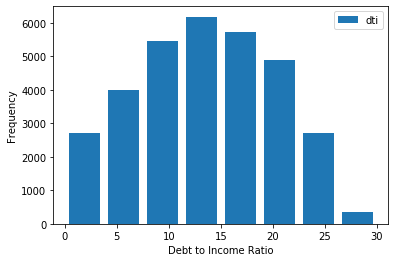

In [56]:

loan[['dti']].plot(kind='hist',bins=8,rwidth=0.8)
plt.xlabel('Debt to Income Ratio')
plt.show()

## <font color="red">Analysis: The `debt to income ratio` mostly range between mostly 8 to 22</font>

### Frequency of Loan Amount

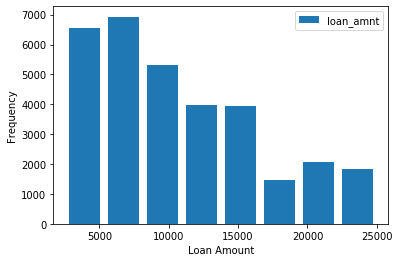

In [57]:
loan[['loan_amnt']].plot(kind='hist',bins=8,rwidth=0.8)
plt.xlabel('Loan Amount')
plt.show()

## <font color="red">Analysis: Maximum `loan amount` are less </font>

## Define a function to plot graphs for Univariate Analysis

In [58]:

def plot_univariate_Graph(value_column, index_column,type_of_graph):
    index_list=[]
    index_list.append(index_column)
    values_list=[]
    values_list.append(value_column)
    term_Charged_off_pivot = pd.pivot_table(loan, values=values_list[0],index=index_list, aggfunc=np.sum)
    term_Charged_off_pivot.reset_index(inplace=True)
    term_Charged_off_pivot.plot(kind=type_of_graph,x=index_list[0],y=values_list[0],color='blue')
    plt.rcParams["figure.figsize"] = (10,10)
    plt.show()

# Analysis for the Default Risk for State

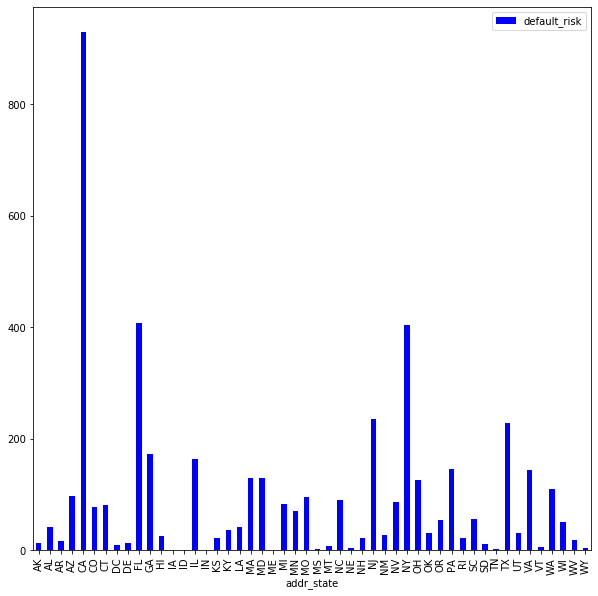

In [60]:
plot_univariate_Graph('default_risk','addr_state','bar')

## <font color="red">Analysis: `California`, `Florida` and `New York` areas see the maximum number of defaulters</font>

# Analysis of Default Risk by  Interest Rate

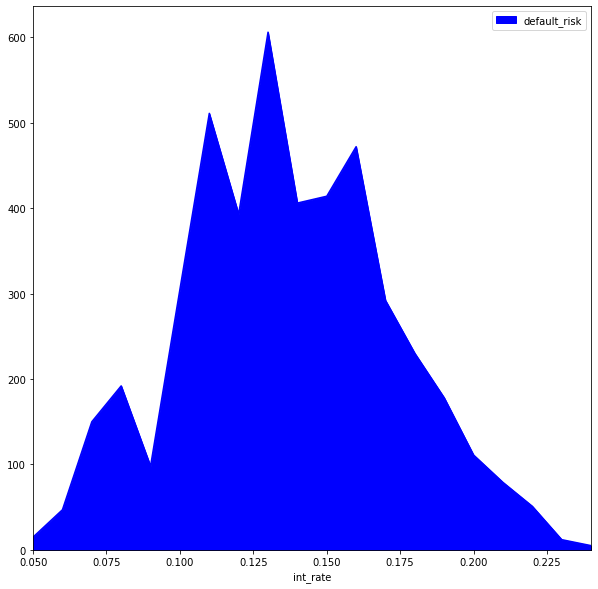

In [61]:
plot_univariate_Graph('default_risk','int_rate','area')

## <font color="red">Analysis: We see majority loan defaulters who have `interest rates` between 11% to around 16%</font>

# Analysis of Default Risk by Installment

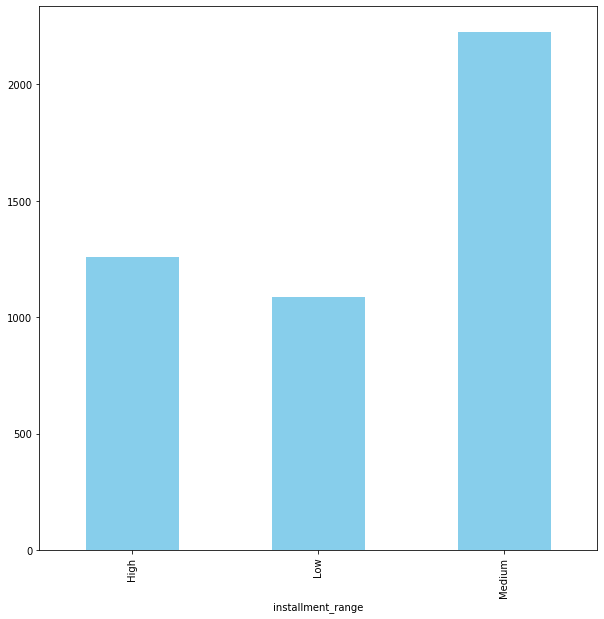

In [62]:
loan.groupby('installment_range')['default_risk'].sum().plot.bar(color="skyblue")

## <font color="red">Analysis: `Installments` of Medium range between 182 to 400 dollars see maximum defaulters</font>

# Analysis of default risk by Home ownership

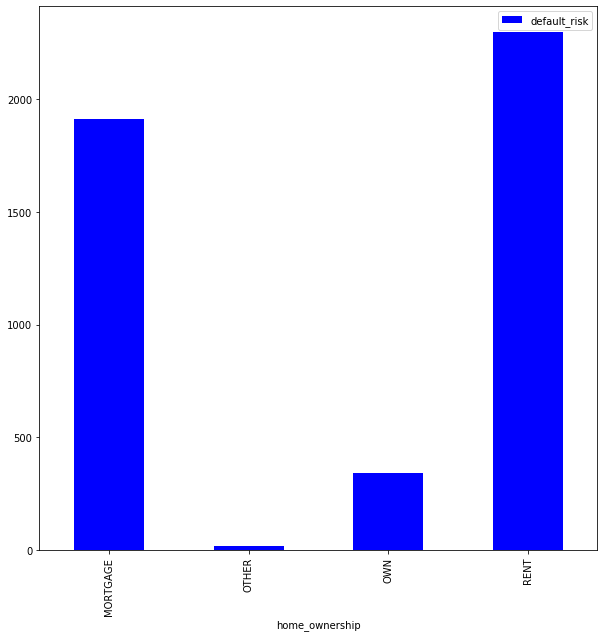

In [63]:
plot_univariate_Graph('default_risk','home_ownership','bar')

## <font color="red">Analysis: Home Ownership of type `MORTGAGE` and `RENT` have the majority defaulters</font>

# Default Risk by Purpose of the Loan

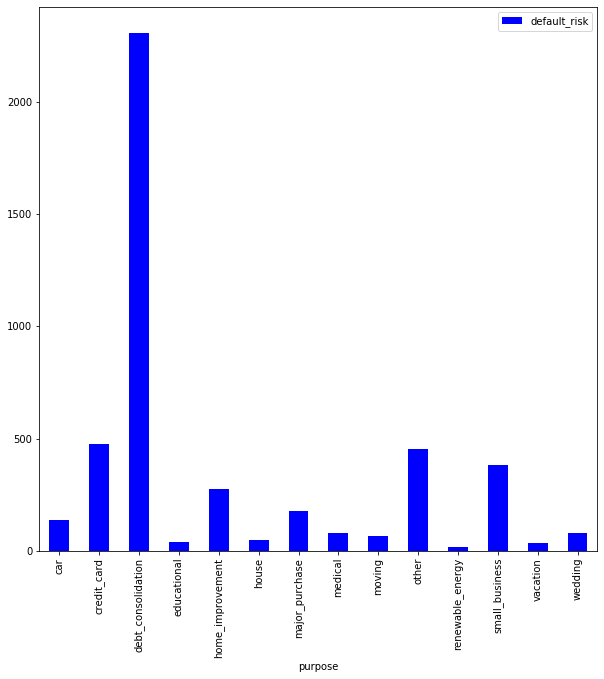

In [64]:
plot_univariate_Graph('default_risk','purpose','bar')

## <font color="red">Analysis: Clearly we see that Loan Purpose for `debt_consolidation` can be taken as __high Risk__</font> 
    
## <font color="red">For `Credit Card`, `small_business` and `other` can be considered as __medium risk__</font>

# Default Risk by Dept to Income Ratio 

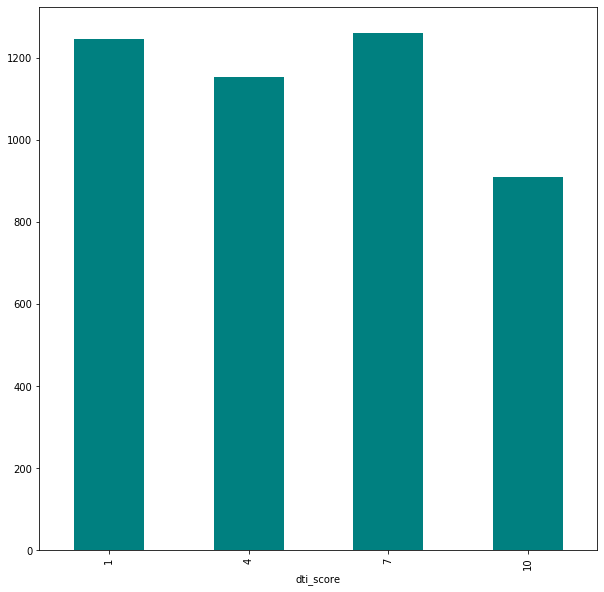

In [65]:
# using the dti_score by grouping the dti values into groups to show a proper range...
loan.groupby(['dti_score'])['default_risk'].sum().plot.bar(color="teal")

## <font color="red">Analysis: Higher range dti ,lesser are the numner of loan defaulters.. i.e. if the dti ratio is less than 8 then it has lower risk</font> 

# <font color='blue'>BiVariate Analysis</font>

## Generate a Correlation HeatMap to get the impact of the variables on the `default_risk` target column

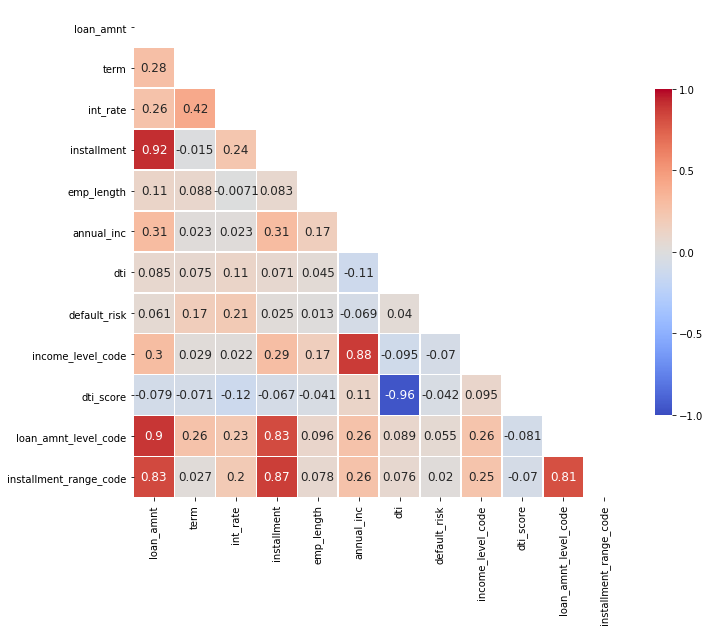

In [66]:
corr_matrix = loan.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sn.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sn.set_style({'xtick.bottom': True}, {'ytick.left': True})

## <font color="red">Analysis: We confirmed that our selected variables do have positive correlation with target column default_task</font>

## Analysis of ```Charged off (default_risk = 1) and paidsoffs(default_risk = 0)``` by ```debt to income Ratio``` and ```Loan Amount```
## For the analysis we have created column `dti_score` with Ordinal values for the dti where `1=bad , 4=average, 7=good and 10=best`

<Figure size 9600x6400 with 0 Axes>

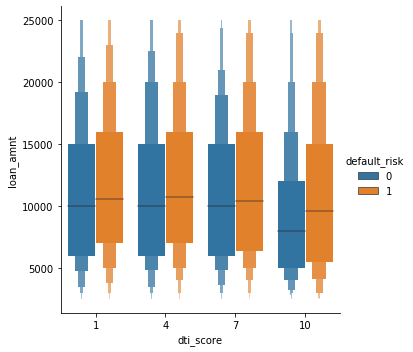

In [67]:
# boxenplot()

# set figure size for larger figure
plt.figure(num=None, figsize=(120, 80), dpi=80, facecolor='w', edgecolor='k')
sn.catplot(x="dti_score", y="loan_amnt", kind="boxen",hue="default_risk",data=loan);

## <font color="red">Analysis: We can observe that as the dti score increases the median of the defaulters decreases </font>

## Define function to plot graphs for Bivariate Analysis

In [68]:
def barplotBiVariateAnalysis(xcolumn,ycolumn,hueColumn,title,is_sorted):
    xcollist = []
    xcollist.append(xcolumn)
    if is_sorted:
        sn.barplot(x=loan[xcollist[0]].sort_values(ascending=True), y=ycolumn, hue=hueColumn, data=loan, estimator=np.median)
    else:
        sn.barplot(x=loan[xcollist[0]], y=ycolumn, hue=hueColumn, data=loan, estimator=np.median)
    plt.title(title)
    plt.show()

# Analysis of ```default risk (1 - Defaulters 0 - Paid Off)``` by ```int_rate``` and ```loan_amnt```

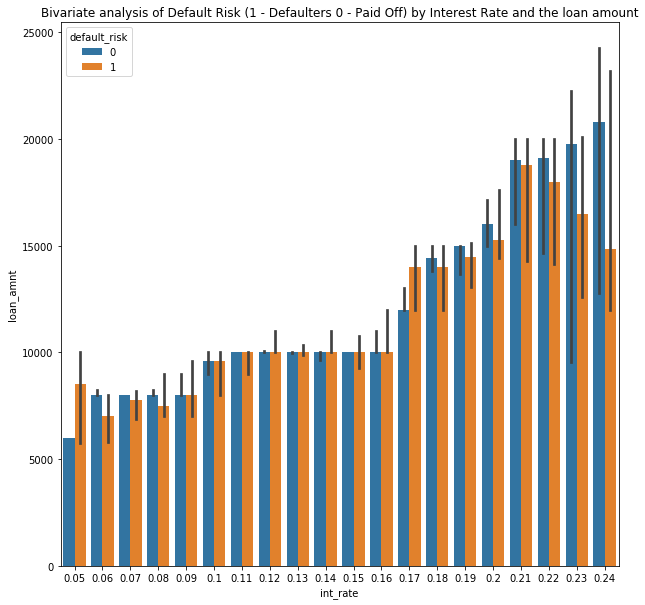

In [69]:
barplotBiVariateAnalysis('int_rate','loan_amnt','default_risk',
                         "Bivariate analysis of Default Risk (1 - Defaulters 0 - Paid Off) by Interest Rate and the loan amount",False)

## <font color="red">Analysis: Above plot shows that with increase in loan amount and the interest rate, the defaulter risk increases.</font>

# Analysis of ```default risk (1 - Defaulters 0 - Paid Off)``` by ```grade``` and ```loan_amnt```

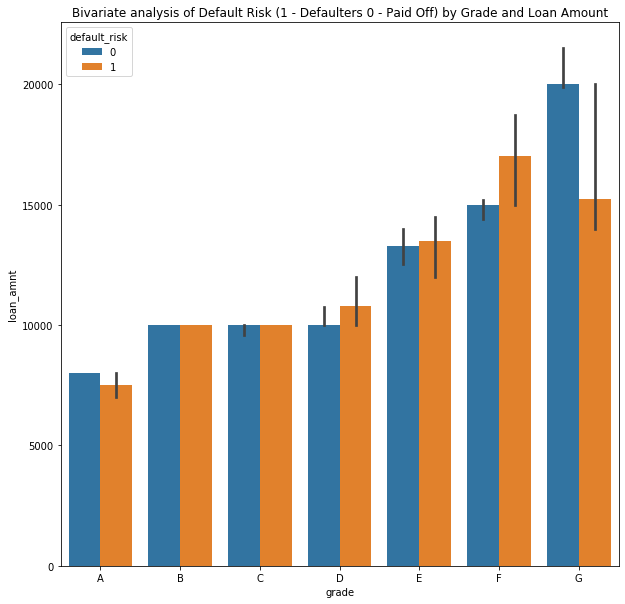

In [70]:
barplotBiVariateAnalysis('grade','loan_amnt','default_risk',
                         "Bivariate analysis of Default Risk (1 - Defaulters 0 - Paid Off) by Grade and Loan Amount",True)

## <font color="red">Analysis: Above plot shows that with increase in loan amount and decrease in the grade ,default risk increases</font>

<!-- ### Analysis of ```default risk``` by ```sub_grade``` and ```loan_amnt``` -->

# Analysis of ```default risk (1 - Defaulters 0 - Paid Off)``` by ```home_ownership``` and ```loan_amnt```

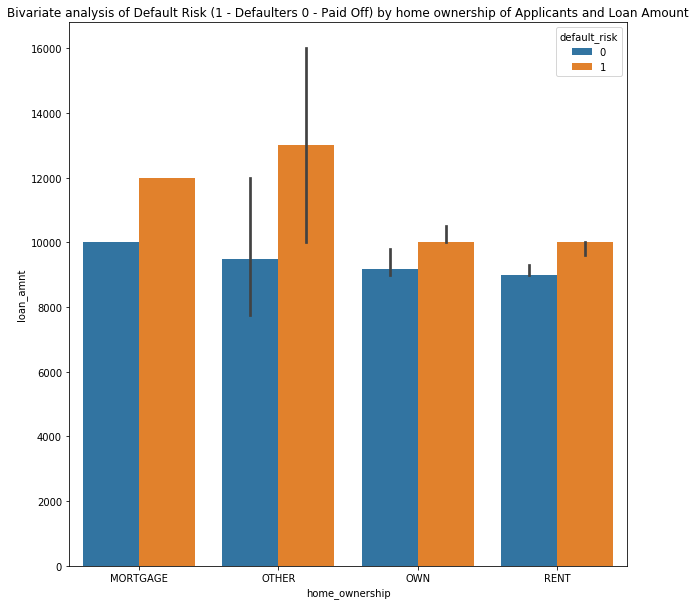

In [71]:
barplotBiVariateAnalysis('home_ownership','loan_amnt','default_risk',
                         "Bivariate analysis of Default Risk (1 - Defaulters 0 - Paid Off) by home ownership of Applicants and Loan Amount",True)
# WITHOUT OUTLIERS

## <font color="red">Analysis: Above plot shows that those with home ownership as mortgage and Other category have greater default risk</font>

# Analysis of ```default risk (1 - Defaulters 0 - Paid Off)``` by ```income Level ``` and ```loan amount ```

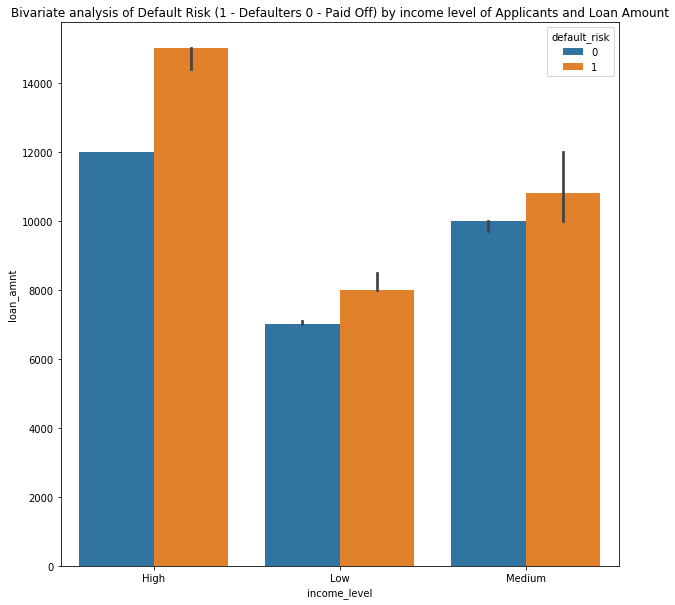

In [72]:
barplotBiVariateAnalysis('income_level','loan_amnt','default_risk',
                         "Bivariate analysis of Default Risk (1 - Defaulters 0 - Paid Off) by income level of Applicants and Loan Amount",True)

## <font color="red">Analysis: Above plot shows that in the higher income level, the ratio of defaulters to paid offs are more compared to low and medium income groups</font>

# Analysis of ```default risk``` by ```loan amount``` and ```annual income ```

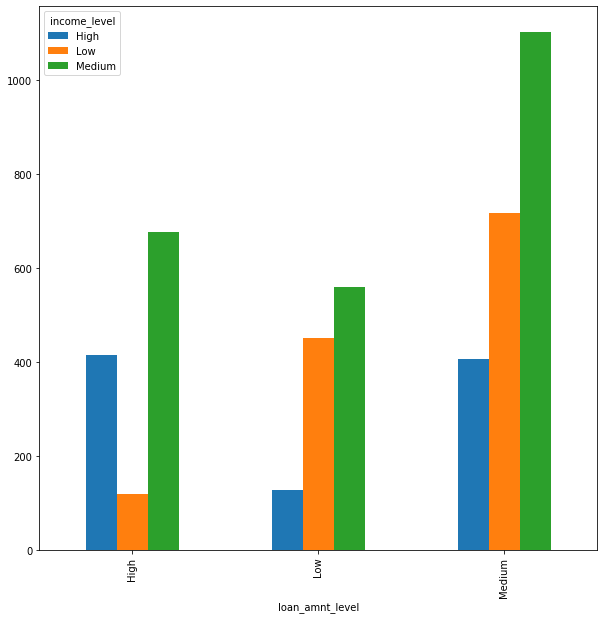

In [73]:
loan.groupby(['loan_amnt_level','income_level'])['default_risk'].sum().unstack().plot.bar()                              

## <font color="red">Analysis: Income levels of Medium and loan amounts of Medium level have maximum loan defaulters</font>

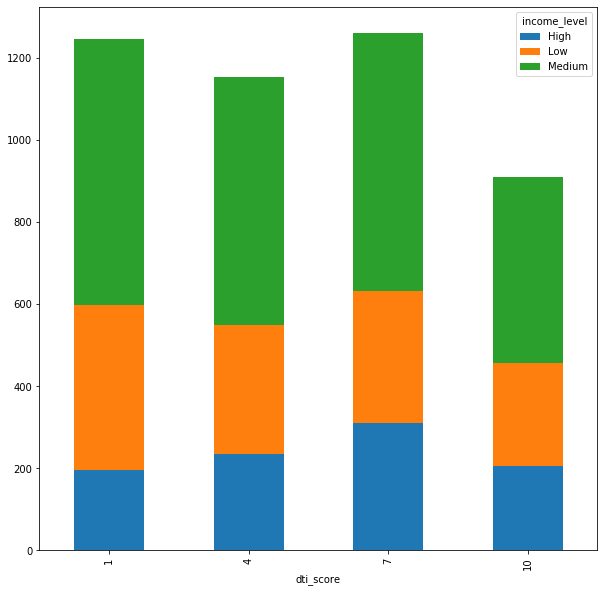

In [74]:
loan.groupby(['dti_score','income_level'])['default_risk'].sum().unstack().plot.bar(stacked=True)

## <font color="red">Analysis: Across all the dti scores, income level of medium has been defaulting highest</font>